In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn

# Mock dataset

X.shape: (26, 2)


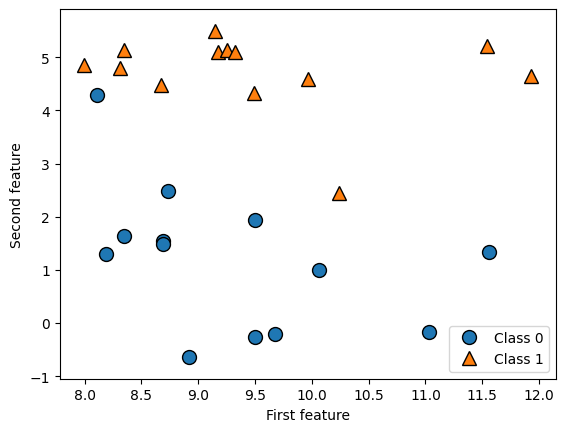

In [4]:
# A made-up dataset

X, y = mglearn.datasets.make_forge()

# plot dataset
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")

print("X.shape: {}".format(X.shape))

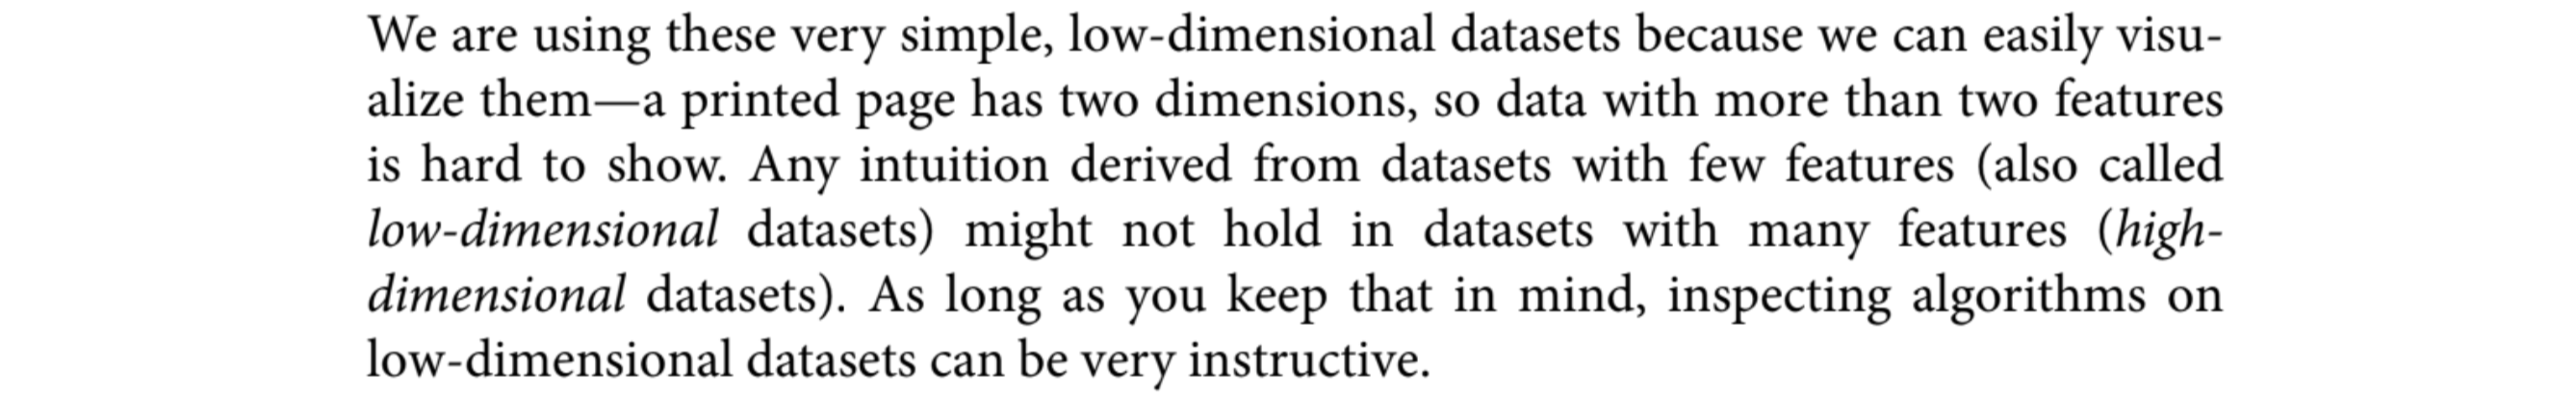

# kNN classification 

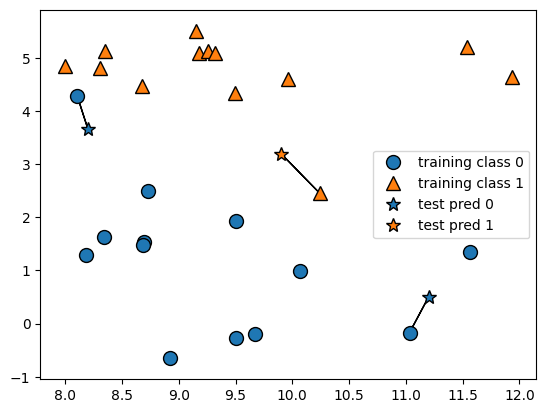

In [45]:
"""
Here, we added three new data points, shown as stars. For each of them, we marked
the closest point in the training set. The prediction of the one-nearest-neighbor algo‐
rithm is the label of that point (shown by the color of the cross).
"""

mglearn.plots.plot_knn_classification(n_neighbors=1)

# In principle, there are two important parameters to the KNeighbors classifier: the
# number of neighbors and how you measure distance between data points.

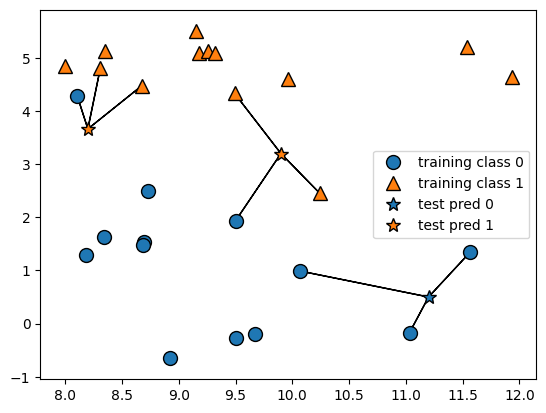

In [17]:
"""
Instead of considering only the closest neighbor, we can also consider an arbitrary
number, k, of neighbors. This is where the name of the k-nearest neighbors algorithm
comes from. When considering more than one neighbor, we use voting to assign a
label. This means that for each test point, we count how many neighbors belong to
class 0 and how many neighbors belong to class 1. We then assign the class that is
more frequent: in other words, the majority class among the k-nearest neighbors.
"""

mglearn.plots.plot_knn_classification(n_neighbors=3)

In [18]:
from sklearn.model_selection import train_test_split

X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [19]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3)

In [20]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [21]:
print("Test set predictions: {}".format(clf.predict(X_test)))

Test set predictions: [1 0 1 0 1 0 0]


In [22]:
# How well does the model generalise?

print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

Test set accuracy: 0.86


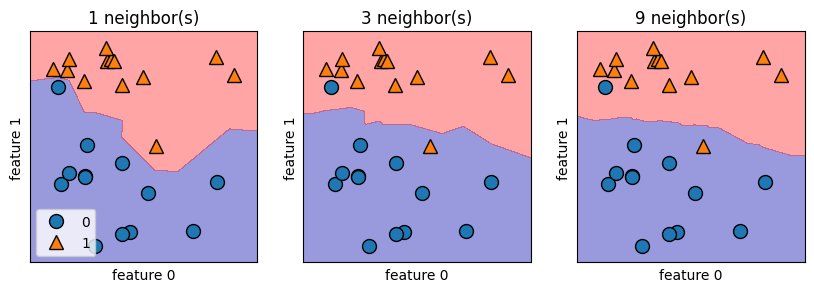

In [24]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
    axes[0].legend(loc=3)

Fewer neighbours --> more wiggly decision boundary --> more complex model

# Real data

In [27]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

print("cancer.keys(): \n{}".format(cancer.keys()))

print("Sample counts per class:\n{}".format({n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

print("Feature names:\n{}".format(cancer.feature_names))

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

cancer.keys(): 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
Sample counts per class:
{'malignant': 212, 'benign': 357}
Feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


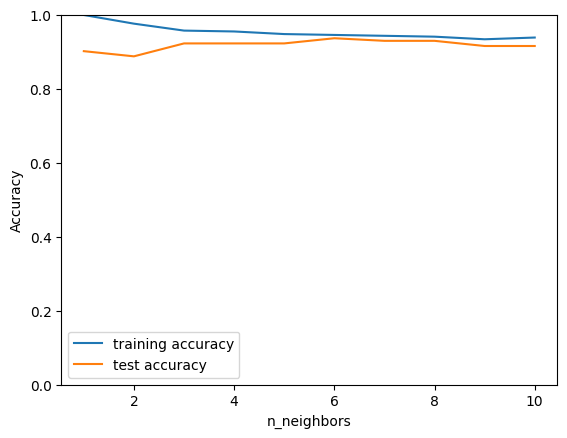

In [33]:
training_accuracy = []
test_accuracy = []

neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.ylim(0, 1)
plt.legend()

Considering a single nearest neighbor, the prediction on the training set is perfect. 
But when more neighbors are considered, the model becomes simpler and the training accuracy 
drops. The test set accuracy for using a single neighbor is lower than when using more neigh‐
bors, indicating that using the single nearest neighbor leads to a model that is too
complex. On the other hand, when considering 10 neighbors, the model is too simple
and performance is even worse. The best performance is somewhere in the middle,
using around six neighbors.

This is because:
In KNN, the value of k (n_neighbors) is a smoothing parameter.

* A small k (e.g., k=1) creates a complex, "wiggly" decision boundary. It pays attention to every single detail and noise point in the training data.
* A large k (e.g., k=10 or k=50) creates a simple, smooth decision boundary. It ignores fine details and looks at the broader trends.


# kNN regression

Text(0, 0.5, 'Target')

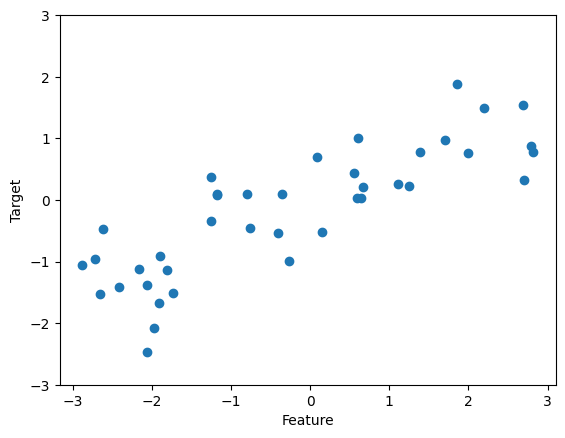

In [36]:
# Another made-up dataset

X, y = mglearn.datasets.make_wave(n_samples=40)

plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")

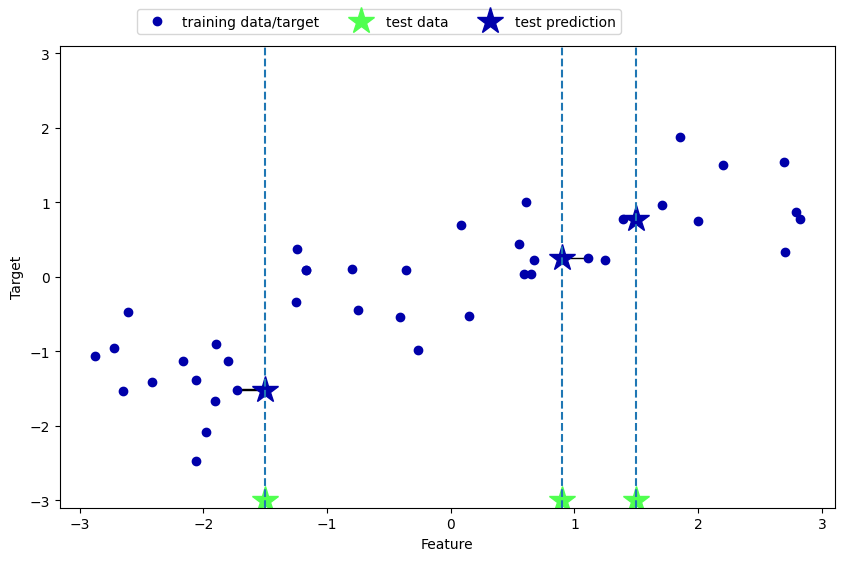

In [37]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

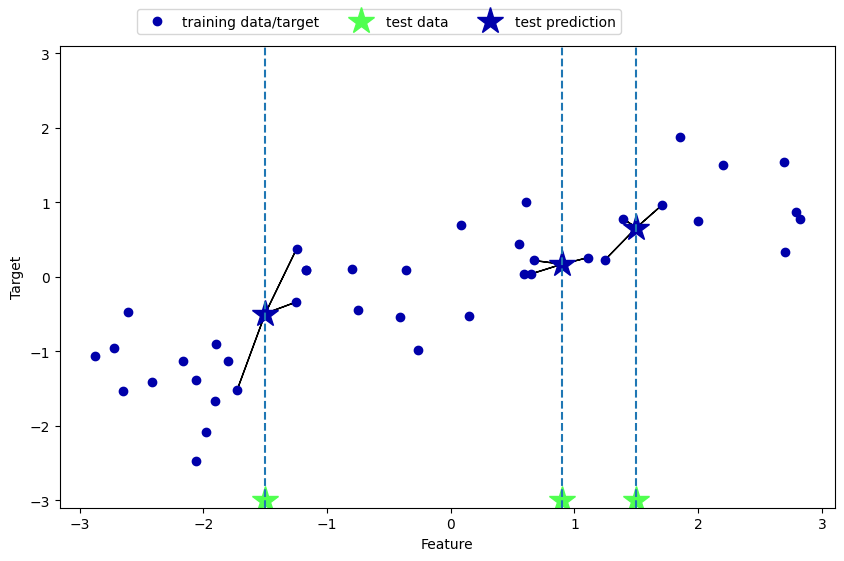

In [38]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [40]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

# split the wave dataset into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# instantiate the model and set the number of neighbors to consider to 3
reg = KNeighborsRegressor(n_neighbors=3)

# fit the model using the training data and training targets
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [41]:
print("Test set predictions:\n{}".format(reg.predict(X_test)))

Test set predictions:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [42]:
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

Test set R^2: 0.83


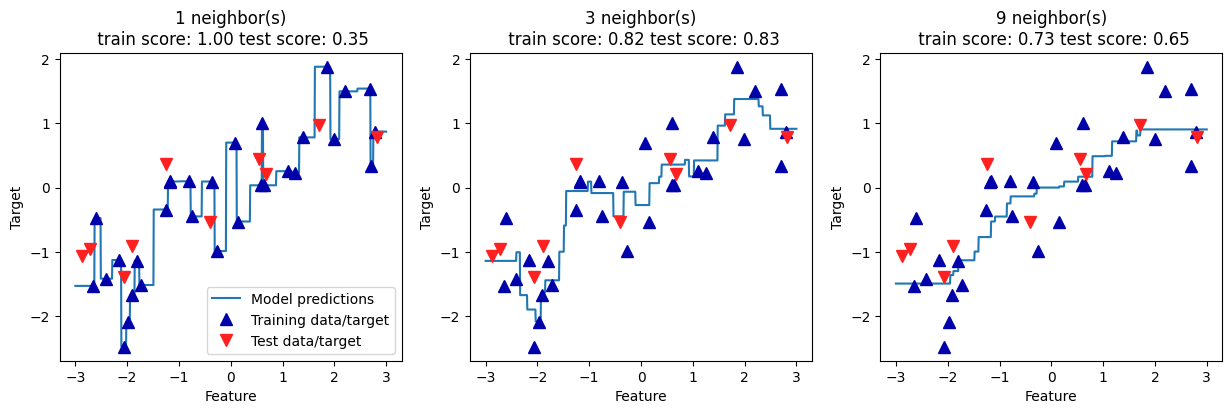

In [44]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# create 1,000 data points, evenly spaced between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)

for n_neighbors, ax in zip([1, 3, 9], axes):
    # make predictions using 1, 3, or 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    ax.set_title("{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
    n_neighbors, reg.score(X_train, y_train),
    reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
    
axes[0].legend(["Model predictions", "Training data/target", "Test data/target"], loc="best")